# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [37]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

# Lecture 2 - Single-Stage MOS Amplifiers

## Week 2

 - Chapter 2 of Razavi (basic MOS physics)
     - Review: DC small signal model (2.4.3) 
 - Chapter 3 of Razavi (single-stage amplifiers)
 - Chapter 5 of Razavi (current mirrors)
     - Section 5.1 Basic Current Mirrors

## Overview

 - Last time…
     - MOSFET drain current a product of vertical ($V_{GS}$) and lateral ($V_{DS}$) electric fields
     - MOS behaves as a resistor in triode ($V_{DS} << V_{GS} – V_{TH}$) and a current source in saturation ($V_{DS} > V_{GS} – V_{TH}$)
     - Small-signal model obtained by linearizing MOS behavior about a DC operating point (i.e. specific value of $V_{GS} = V_{GS0}$)
 - Today…
     - Small signal model, cont.
     - PMOS transistors
     - Common source amplifier
         - Passive load
         - Active load 
     - Basic current mirror

## First-order MOS model summary

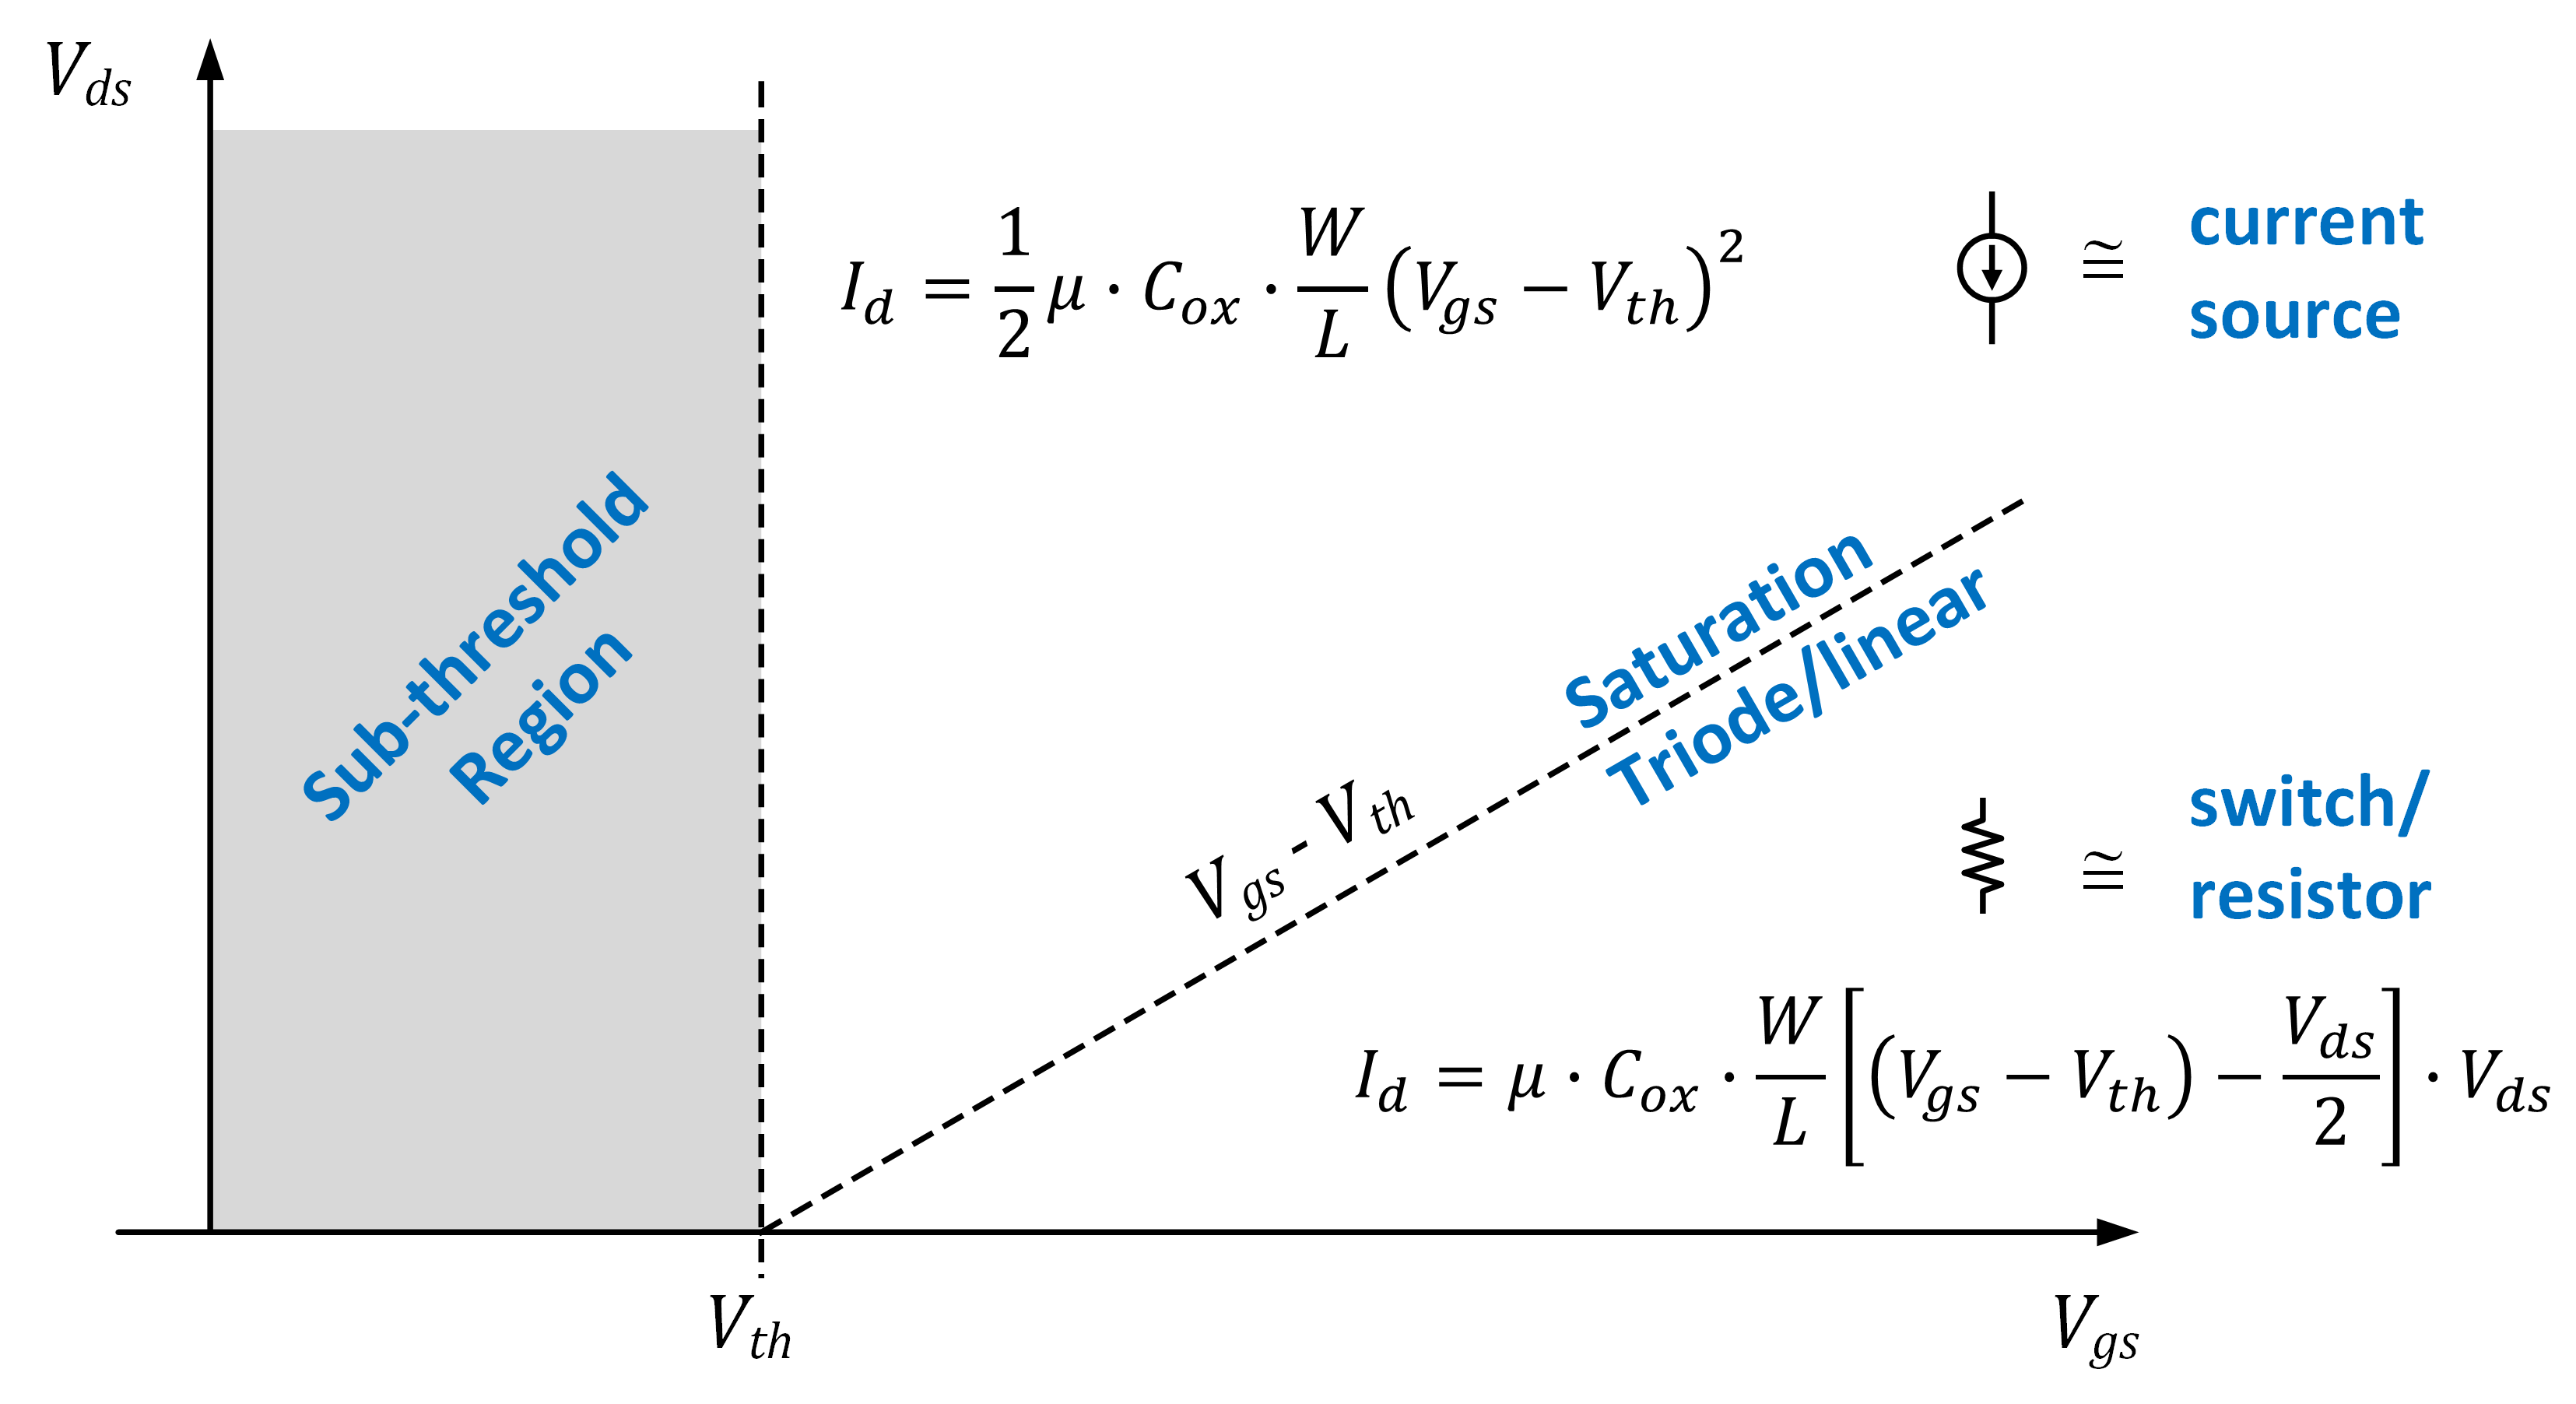

## DC small-signal model

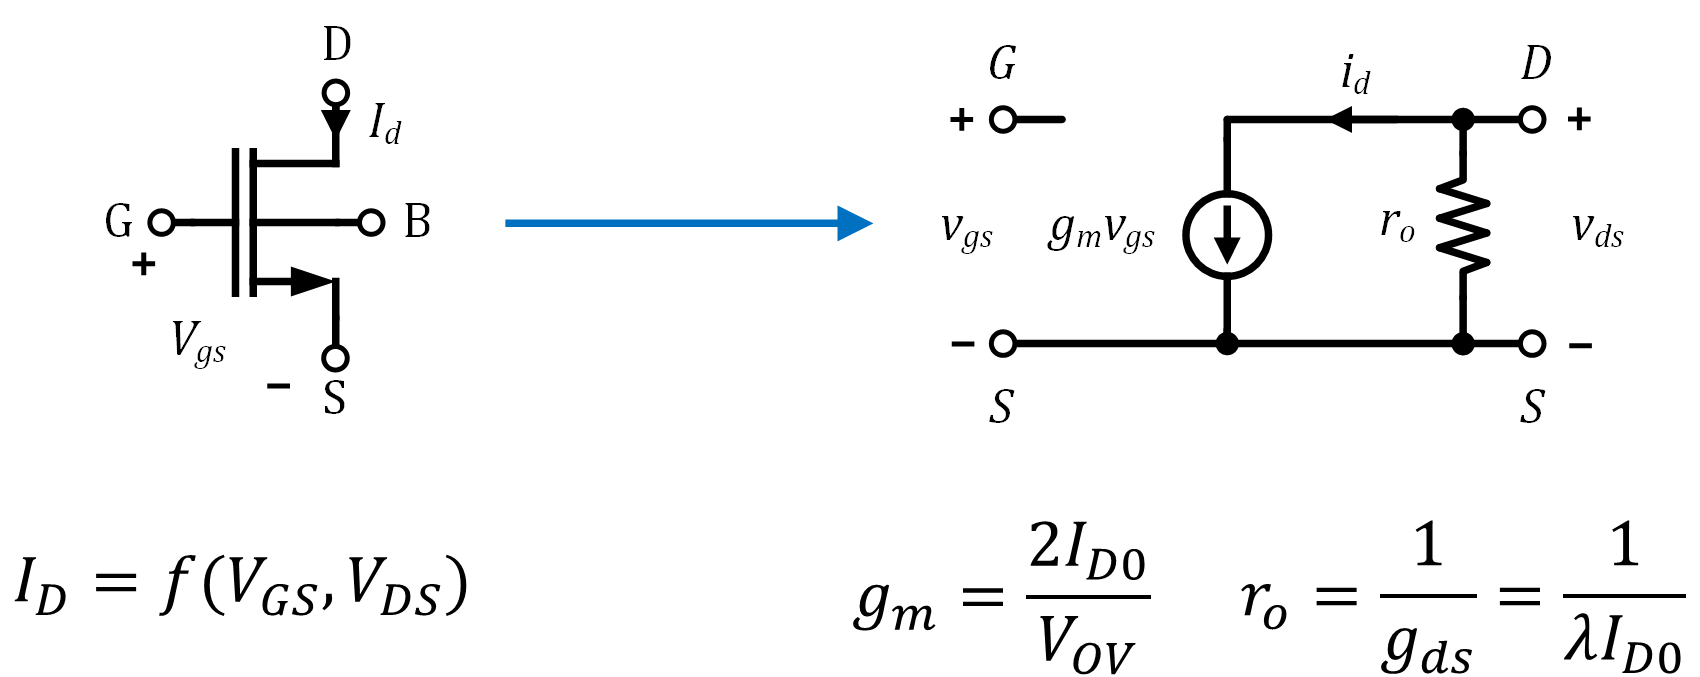

 - Small-signal model replaces nonlinear $I_D(V_{GS}, V_{DS})$ with linear parameters $g_m$ and $r_o$ that enable the use of linear circuit analysis techniques
 - *Important*: All DC voltages become AC ground in the small-signal model

## PMOS transistor

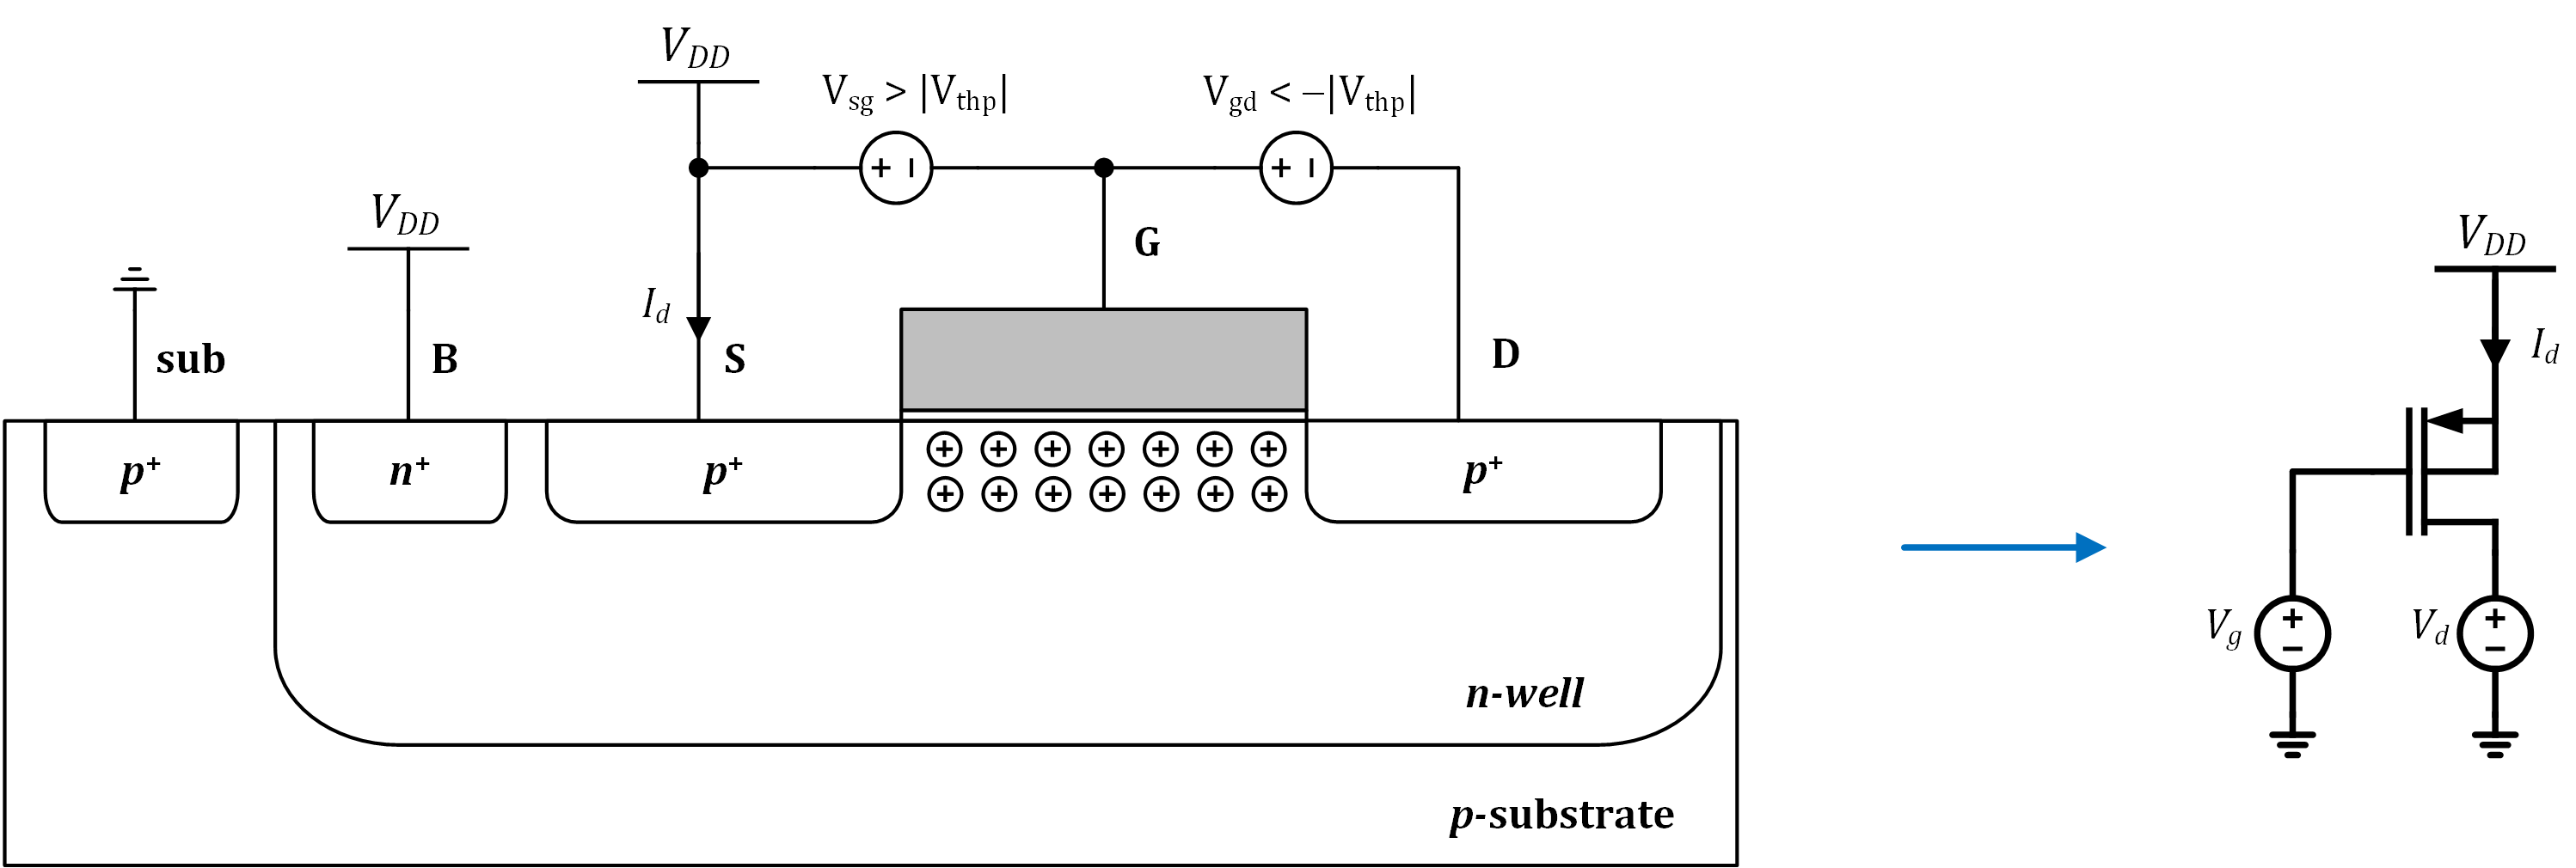

 - In $CMOS$ processes, $PMOS$ transistors are produced in the same substrate as NMOS
 - To operate in saturation, the following requirements must be satisfied:
     - $V_{sg} > |V_{thp}|$
     - $V_{sd} > V_{sg} - |V_{thp}|$
 - The saturation current for a $PMOS$ transistor is thus given by
 
\begin{equation}
I_d = \dfrac{1}{2}\mu_p C_{ox} \dfrac{W}{L} (V_{sg} - |V_{thp}|)^2(1+\lambda V_{sd})
\end{equation}

## High-gain amplifier design

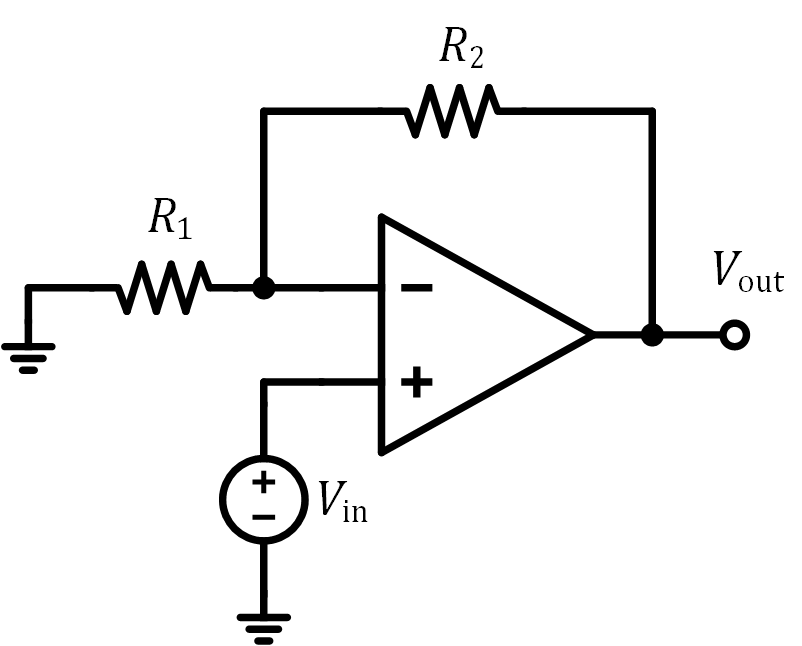

\begin{align}
G &= \dfrac{V_{out}}{V_{in}} = \dfrac{A_v}{1+\beta A_v}
\end{align}

\begin{equation}
\beta = \dfrac{R_1}{R_1+R_2}
\end{equation}

 - if $\beta A_v$ $>> 1$, 


\begin{equation}
G = \dfrac{A_v}{1+\beta A_v} \rightarrow \dfrac{1}{\beta}
\end{equation}

 - High-gain amplifiers are used to desensitize transfer functions to temperature- and manufacturing-dependent physical parameters (e.g. $g_m$ and $r_o$)
 - Typical values of $A_v$ for opamps are $100 - 140 dB$ ($100,000 - 10,000,000 V/V$)
 - High *open-loop* gain ($A_v$) $\rightarrow$ precise *closed-loop* gain ($G$)
 - For this reason, when designing CMOS amplifiers (i.e. opamps and OTAs) substantial emphasis is placed on achieving high open-loop gain

## Common-source amplifier

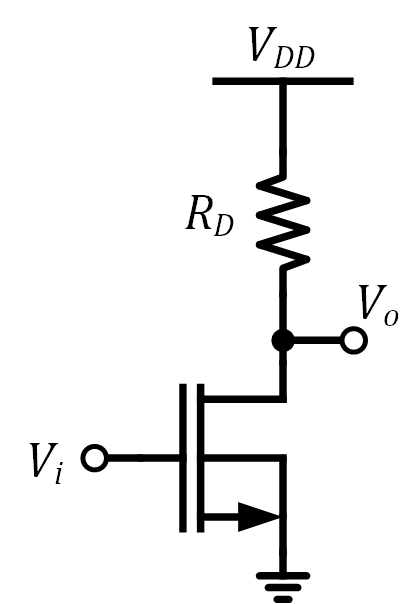

\begin{equation}
I_d = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{i}-V_{th})^2 (1+\lambda V_{o})
\end{equation}

\begin{equation}
V_o = V_{DD} - I_d\cdot R_D
\end{equation}

 - The common-source amplifier is an exemplary model of how we achieve gain in analog circuits:
     - Change in the output current $\Delta I_d$ is realized (primarily) by a change in the input voltage $\Delta V_i$ and the voltage-current relationship of the device
     - Output voltage changes as the result of $\Delta I_d$ flowing through the output resistance of the circuit (in this case, $R_D$)

## Ouput voltage minimum/maximum (swing)

 - For the maximum voltage, when $V_o = V_{DD}$, current no longer flows through $R_D$ and changes in the input cannot effect changes in the output
 - For the minimum, to ensure the transistor remains in saturation $V_o$ should be greater than the overdrive voltage, $V_i - V_{th}$
 - The valid range of output voltages is thus
 
\begin{equation}
V_i - V_{th} < V_o < V_{DD}
\end{equation}

 - Assuming signals swing symmetrically above and below the operating point, we can maximize use of the output swing by selecting $R_D$ and $I_D$ to an output operating point at the output of $V_O = V_{DD}/2$

## Small-signal model

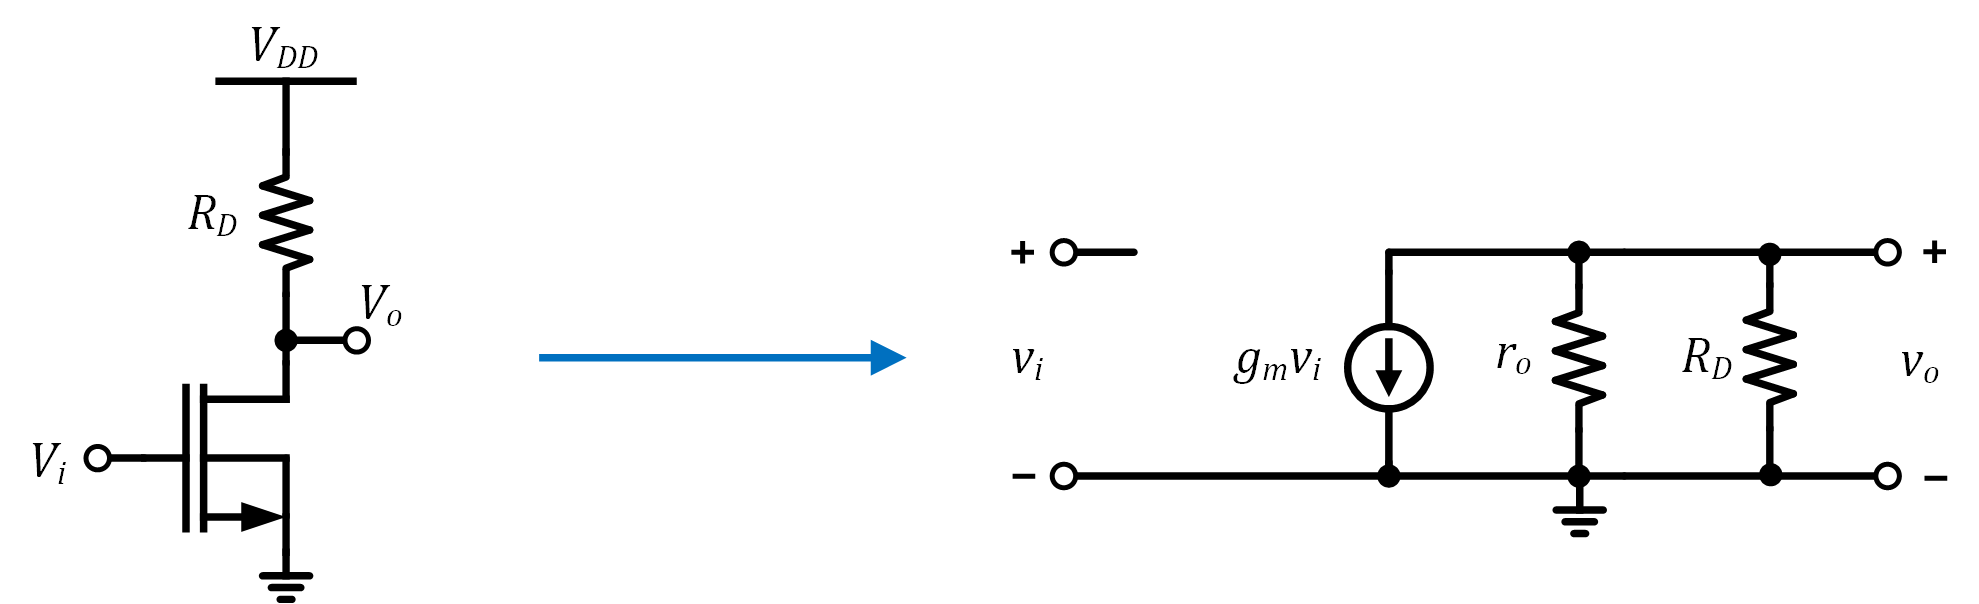

 - $V_{DD}$ is a $DC$ (constant) voltage, making it an $AC$ (small-signal) ground
 - $r_o$ and $R_D$ appear in parallel in the small-signal model


## MOS amplifier analysis

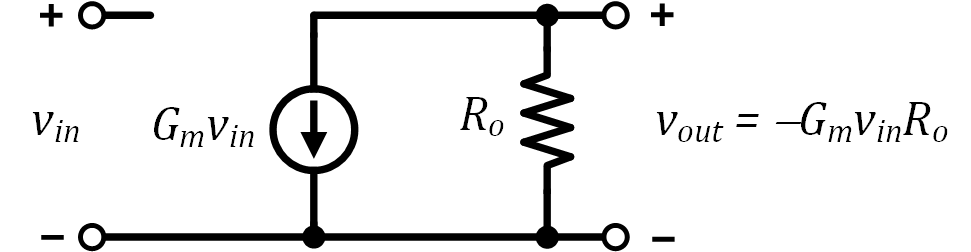

 - Voltage gain in transistor-based circuits is *almost always* realized as the product of a transconductance $G_m$ and a small-signal resistance $R_o$
 - Analysis approach: Use Norton analysis to determine the parameters $G_m$ and $R_o$ using the small signal model
     - Find the short-circuit current $i_{sc}$ to determine $G_m = i_{sc}/v_{in}$
     - The output resistance $R_o$ is determiend by setting $v_{in} = 0$, applying a test voltage to the output, and finding the expression for the resulting current 

## Common-source Norton model (G<sub>m</sub>)

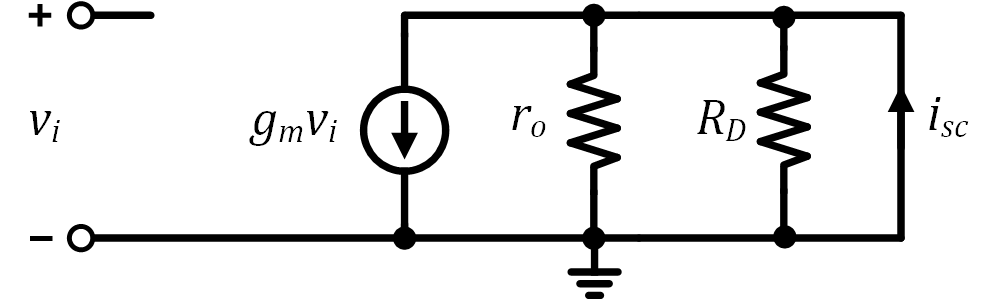

 - To determine $G_m$ in the Norton model, short the output terminals and measure $i_{sc}$
 - Due to the short circuit, no current flows through $r_o$ or $R_D$
 - $G_m$ is determined by taking the ratio of $i_{sc}$ to $v_i$:
 
\begin{equation}
G_m = \dfrac{i_{sc}}{v_i} = \dfrac{g_m \cdot v_i}{v_i}= g_m
\end{equation}

 - Thus, in the case of the common-source amplifier, $G_m = g_m$

## Common-source Norton model (R<sub>o</sub>)

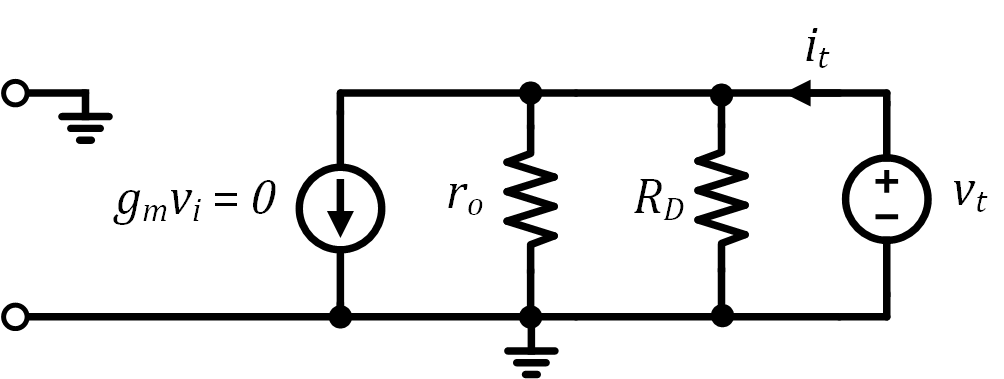

 - To determine $R_o$, apply a test voltage $v_t$ between the output terminals and measure $i_t$
 - Here we can see that $i_t$ is given by

\begin{equation}
i_t = v_t \cdot \left(\dfrac{1}{r_o} + \dfrac{1}{R_d} \right)
\end{equation}

 - Thus, $R_o$ is just the parallel combination of $r_o$ and $R_D$:
 
\begin{equation}
R_o = \dfrac{v_t}{i_t} = \left(\dfrac{1}{r_o}+ \dfrac{1}{R_D} \right)^{-1} = \boxed{r_o || R_D}
\end{equation}

## Relative magnitudes of R<sub>D</sub> and r<sub>o</sub>

 - Output resistance $r_o$ is given by the expression

\begin{equation}
r_o \approx \dfrac{1}{\lambda I_{D0}}
\end{equation}

 - Typical drain resistance $R_D$ can be expressed as (assumes output DC operating point of  $V_{DD}/2$, which allows for maximal output signal swing)
 
\begin{equation}
R_D \approx \dfrac{V_{DD}}{2I_{D0}}
\end{equation}


 - For $V_{DD} = 3V$ and $\lambda = 0.1V^{-1}$, $r_o \approx 7 \times R_D$
 - Thus, for the common-source amplifier,
 
\begin{equation}
\boxed{A_v = -g_m(r_o||R_D) \approx -g_m\cdot R_D}
\end{equation}


## Maximum gain with R<sub>D</sub>

 - What is the maximum gain that can be achieved with a passive (resistive) load?
 
\begin{equation}
A_v \approx -g_m\cdot R_D = -\dfrac{2I_{D0}}{V_{ov}}R_D
\end{equation}


 - Assuming an operating point for the output voltage of $V_{DD}/2$, the gain is given by
 
\begin{equation}
|A_v| \approx \dfrac{2\cdot V_{DD}/2}{R_D\cdot V_{ov}}\cdot R_D = \dfrac{V_{DD}}{V_{ov}}
\end{equation}

 - Assuming $V_{DD} = 3V$ and $V_{ov} = 150mV$, this limits the gain to approximately $20V/V$
 - This is generally too low to be useful in building an opamp
 - How do we increase gain?


## MOS DC model (intrinsic gain)

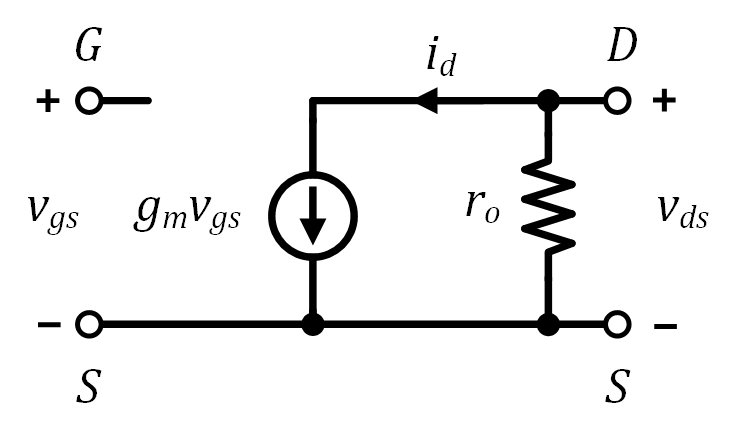

\begin{equation}
g_m = \dfrac{2I_{D0}}{V_{OV}}
\end{equation}

\begin{equation}
r_o = \dfrac{1}{g_{ds}} = \dfrac{1}{\lambda I_{D0}}
\end{equation}

\begin{equation}
\left|\dfrac{v_{ds}}{v_{gs}}\right| = \dfrac{g_m}{g_{ds}} = \dfrac{2}{\lambda V_{OV}}
\end{equation}

 - Recall that the intrisic gain of the transistor is given by the product of $g_m$ and $r_o$ 
 - $g_m$ increases linearly with drain current, while $r_o$ is inversely dependent, keeping their product constant
 - What is a typical value for $g_m r_o$?



## Intrinsic gain

 - In our Level 1 “process” $\lambda_n = 0.1 V^{-1}$
 - In order to maximize signal swing, we want to use a relatively low overdrive voltage ($V_{ov} = V_{GS} - V_{th}$)
 - Assuming a gate bias of $V_{GS} = 0.9V$ (for example), the intrinsic gain is given as
 
\begin{equation}
g_mr_o \approx \dfrac{2}{\lambda V_{ov}} = \dfrac{2}{0.1 V^{-1} \times 200mV} = 100 V/V
\end{equation}

 - This is $5 \times$ the theoretical gain with a resistive load
 - How can we can advantage of intrinsic gain to build amplifiers with gains approaching/exceeding $100dB$?

## Common-source with active load

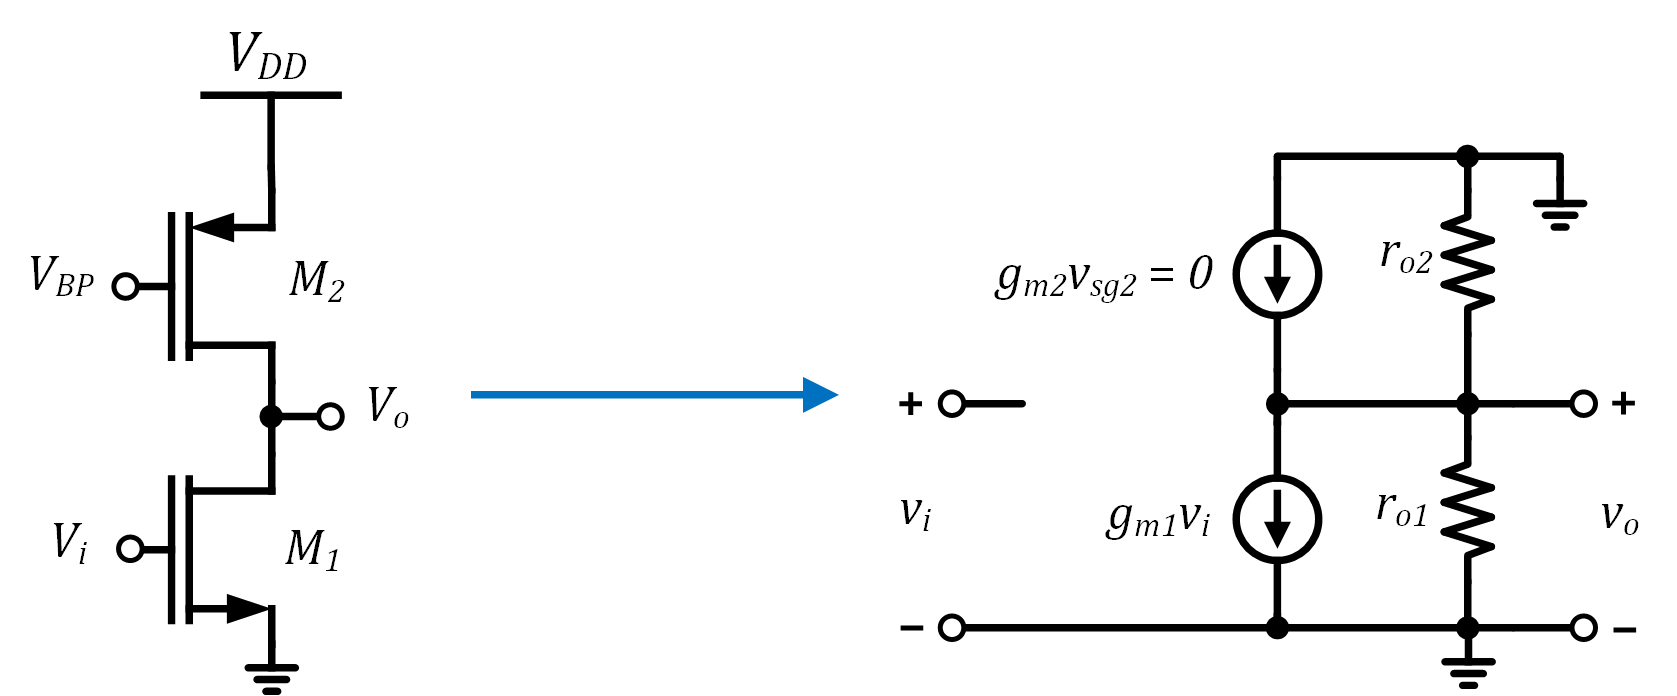

 - We can increase the gain of the common-source statge by replacing the resistor $R_D$with a $PMOS$ transistor in saturation
 - This is referred to as an *active* load, since it replaces a passive device (resistor) with an active one (transistor)
 - The bias voltage $V_{BP}$ sets the $DC$ operating point ($g_{m1,2}$ and $r_{o1,2}$) of the amplifier stage by controlling the drain currents of $M_1$ and $M_2$
 - Because both $V_S$ and $V_G$ of $M_2$ are $DC$ voltages, its transconductance current is zero in the small-signal model

## Small-signal gain

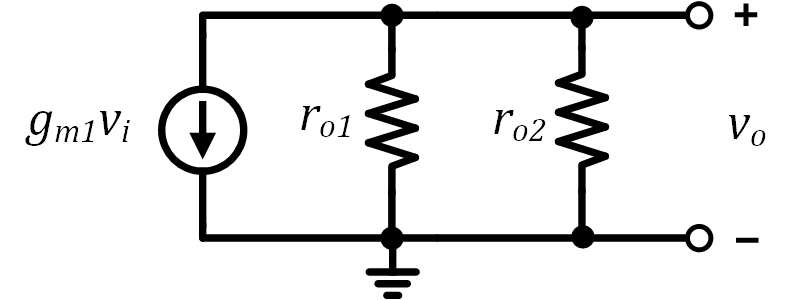

 - In this circuit, $M_1$ functions as a transconductor and $M_2$ behaves as a resistance
 - The small-signal gain expression is identical to that of the passive load, with $R_D$ replaced by $r_{o2}$:

\begin{equation}
A_v = \dfrac{v_o}{v_i} = -g_{m1} \cdot (r_{o1} || r_{o2})
\end{equation}

 - If we make the (somewhat dubious) assumption that $r_{op} = r_{on} = r_o$, we can relate the gain of the active load stage to the MOSFET's intrinsic gain:
 
\begin{equation}
A_v = \dfrac{v_o}{v_i} = -g_{m1} \cdot (r_{o1} || r_{o2}) \approx -\dfrac{g_m\cdot r_o}{2}
\end{equation}

 - In practice $r_{on} \neq r_{op}$, but are of the same order of magnitude 


## Magnitude of the gain

 - Recall that the gain of the common-source stage with a passive load ($R_D$) is

\begin{equation}
A_v = -g_m(r_o||R_D) \approx -g_m\cdot R_D
\end{equation}

 - For a nominal $DC$ output votage of $V_{DD}/2$ (i.e. the $DC$ operating point), this is
 
\begin{equation}
|A_v| \approx \dfrac{2\cdot V_{DD}/2}{R_D\cdot V_{ov}}\cdot R_D = \dfrac{V_{DD}}{V_{ov}} \leq 20V/V
\end{equation}

 - For the active-load stage, the gain is given by

\begin{equation}
A_v = \dfrac{v_o}{v_i} = -g_{m1} \cdot (r_{o1} || r_{o2})
\end{equation}

 - Using our Level 1 process parameters, this becomes 
 
\begin{equation}
A_v = -g_{m1} \cdot (r_{o1} || r_{o2}) = -g_{m1}\cdot r_{o1} \dfrac{r_{o2}}{r_{o1} + r_{o2}}\approx 33 V/V
\end{equation}

 - This is an improvement, but still fairly low. We'll discuss how to increase this soon...

## Ouput voltage range

 - When $V_o$ is at its maximum value, $M_2$ still needs to be in saturation to operate as a high-resistance load, requiring 
 
\begin{equation}
V_o < V_{DD} - V_{BP} - |V_{thp}|
\end{equation}

 - Similarly, $M_1$ needs to remain in saturation, setting the lower bound on $V_o$ as
 
\begin{equation}
V_o > V_i - V_{th}
\end{equation}

 - The valid range of output voltages is thus
 
\begin{equation}
V_i - V_{thn} < V_o < V_{DD} - V_{BP} - |V_{thp}|
\end{equation}

 - Again to maximize use of this range we would like to set the operating point of $V_o$ to approximately $V_{DD}/2$
 - How do we set the operating point?

In [20]:
def plot_cs_op_point(V_DD, V_BP, V_GS1, V_out):
    I_d1 = nmos_iv_sweep(V_GS1, V_out, 100, 1, 0.1)
    I_d2 = pmos_iv_sweep(V_DD-V_BP, V_DD-V_out, 200, 1, 0.2)
    
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.plot(V_out, 1e6*I_d1, label=r'$I_{d,NMOS}$', color='blue')
    ax.plot(V_out, 1e6*I_d2, label=r'$I_{d,PMOS}$', color='red')
    ax.set_xlabel(r'$V_{out} [V]$')
    ax.set_ylabel(r'$I_{d} [\mu A]$')
    ax.legend()
    ax.grid()

 - Because $I_{D1} = I_{D2}$, the point at which the drain current curves intersect constitutes the operating point of the circuit
 - For a nominal ($DC$) input voltage of $0.86V$, both transistors are approximately in the middle of their saturation ranges and the output voltage is ~$V_{DD}/2$
 - However, if $V_{GS1}$ is changed slightly, the resulting operating point can place either $M_1$ or $M_2$ in triode, drastically decreasing the gain
 - Feedback is required to stabilize the output DC voltage at a desired value (more on this later)

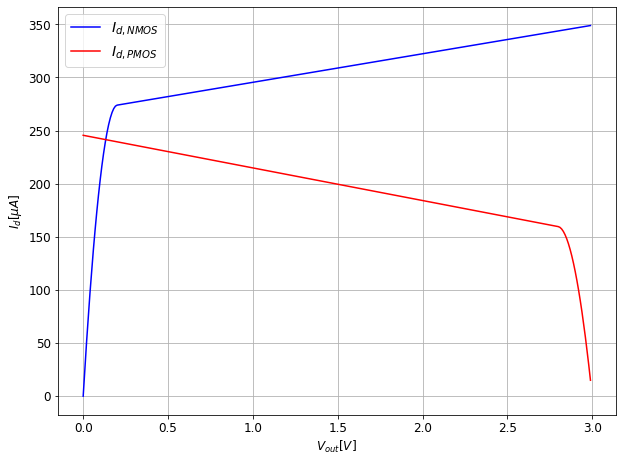

In [36]:
V_DD = 3
V_BP = 2
V_GS1 = .9
V_out = np.arange(0,3,step=0.01)
plot_cs_op_point(V_DD, V_BP, V_GS1, V_out)

## Common-source biasing

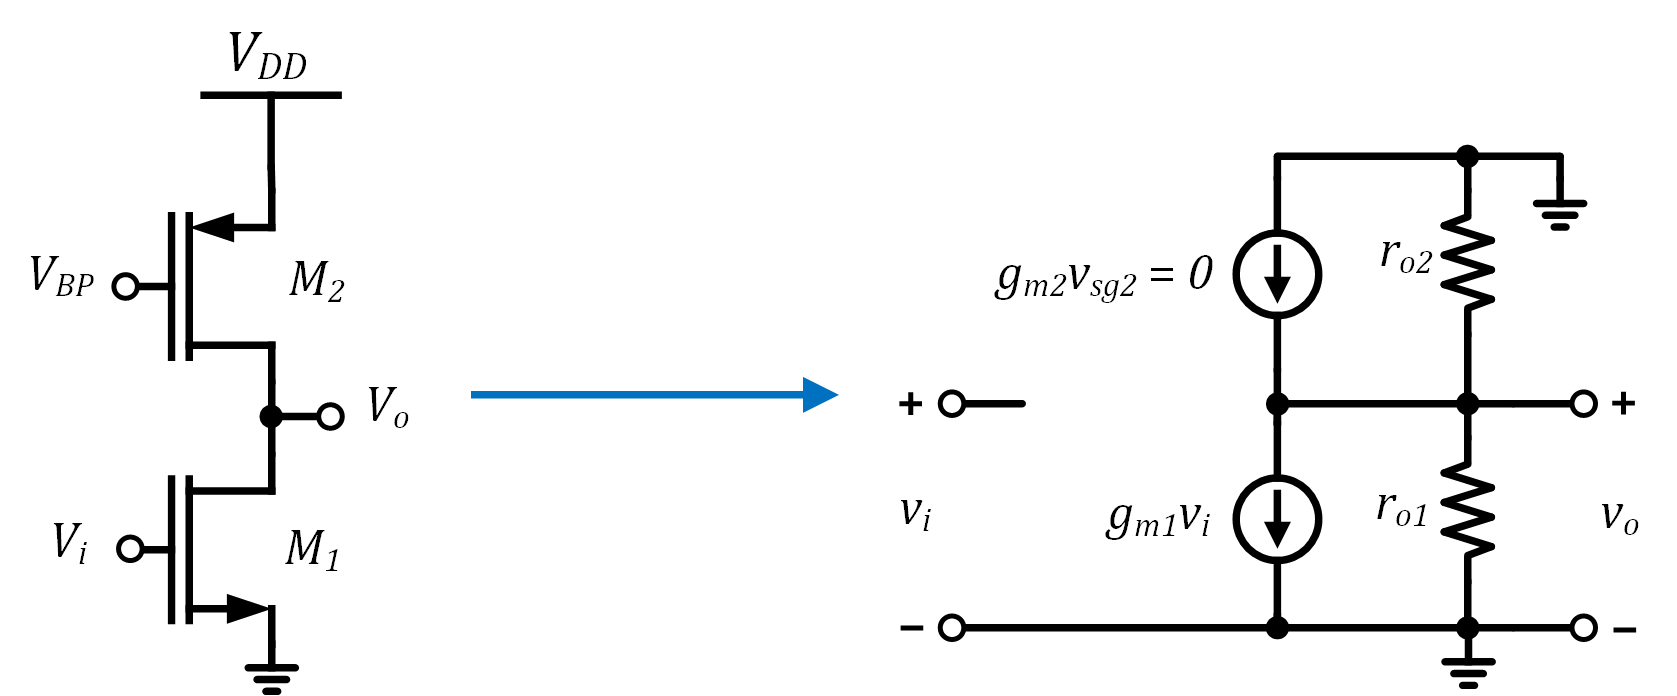

 - If the output voltage is maintained such that both $M_1$ and $M_2$ remain in saturation, the gain is determined by
 
\begin{equation}
A_v = \dfrac{v_o}{v_i} = -g_{m1}\cdot r_{o1}||r_{o2}
\end{equation}

 - where $g_{m1} = 2I_{D1}/V_{OV1}$, $r_{o1} = 1/\lambda_n I_{D1}$, $r_{o1} = 1/\lambda_p I_{D2}$, and $I_{D1} = I_{D2}$
 - $I_{D2}$ ($I_{D1}$) constitutes the $DC$ operating point of the circuit, and is often referred to as the "bias current"
 - How do we control $I_{D2}$?
 


## Basic current mirror

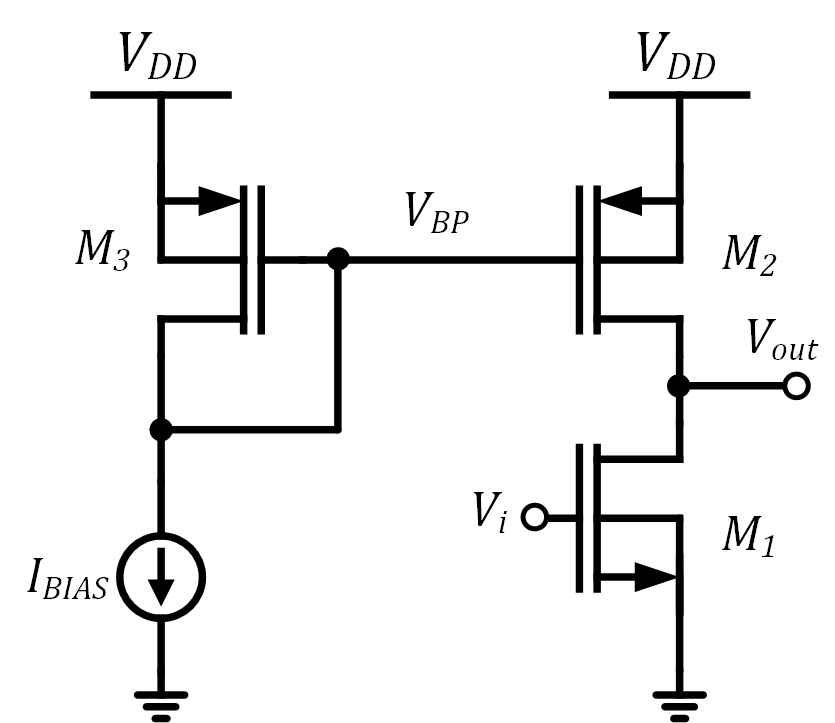

 - Assuming $\lambda_p = 0$, if $(W/L)_2$ $ = (WL)_3$,
 
\begin{equation}
I_{D1} = I_{D2} = I_{D3} = I_{BIAS}
\end{equation}

 - Hence,
 
\begin{equation}
g_{m1} = \dfrac{2I_{BIAS}}{V_{OV}}, \;\; r_{o1} = \dfrac{1}{\lambda_n I_{BIAS}}, \;\; r_{o2} = \dfrac{1}{\lambda_p I_{BIAS}} 
\end{equation}




 - A "diode-connected" transistor ($M_3$ in the figure) converts a current ($I_{BIAS}$) into a voltage ($V_{BP}$) based on the relation
 - Current biasing in this manner allows us to control the small-signal performance of the circuit by designing $I_{BIAS}$ to achieve specific goals (e.g. gain, bandwidth, noise)

## Current mirror operation

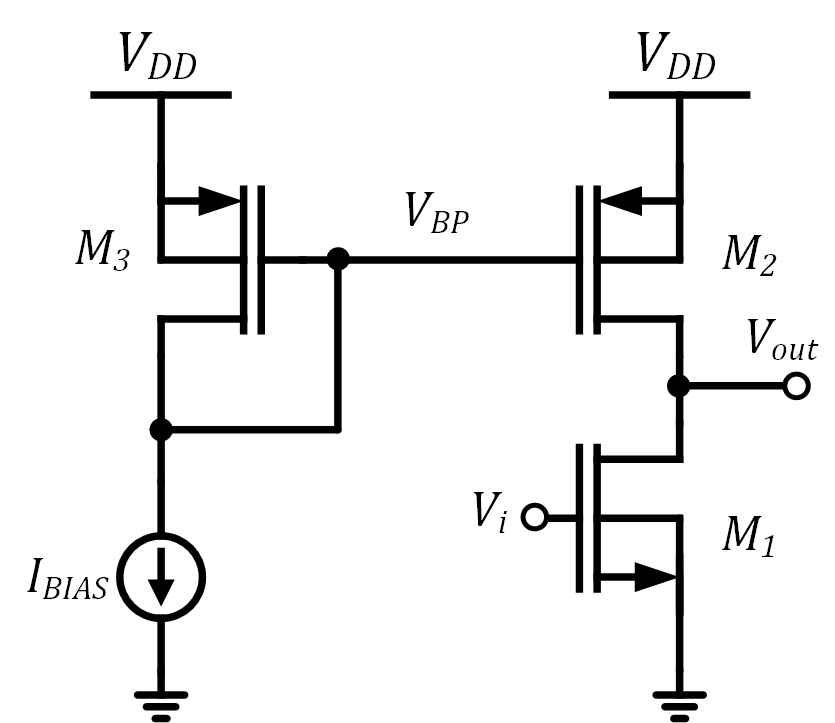

 - Again, assuming $\lambda_p = 0$
 
\begin{equation}
V_{SG3} = |V_{thp}| + \sqrt{\dfrac{2\cdot I_{BIAS}}{\mu_pC_{ox} \left(\dfrac{W}{L}\right)_3}}
\end{equation}

 - The commmon-source bias current is thus
 
\begin{equation}
I_{D1} = I_{D2} = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{DD}-V_{BP}-|V_{thp}|)^2
\end{equation}



 - The "diode" connection (gate and drain shorted together) ensures $M_3$ is always in saturation, since
 
\begin{equation}
V_{SG} = V_{SD} > V_{SG} - |V_{thp}|
\end{equation}

 - Because $M_2$ and $M_3$ share gate and source connections, $M_2$ "mirrors" (i.e. copies) $M_3$'s current
 - However, we have ignored the fact that $V_{SD2}$ is not necessarily equal to $V_{SD3}$
 - How do $I_{D1}$, $I_{D2}$ vary with $V_{out}$?

## Finite output resistance

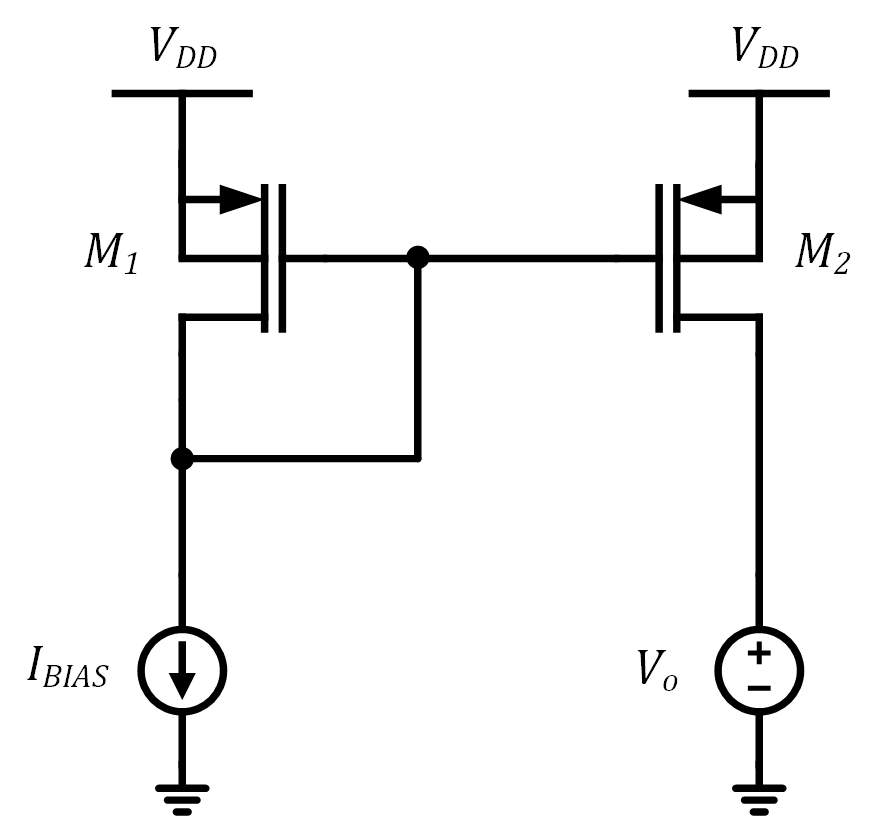

 - Considering the effect of channel-length modulation on $M_2$'s drain current gives

\begin{equation}
I_{D2} = \dfrac{1}{2}\mu\cdot C_{ox} \cdot \dfrac{W}{L}(V_{DD}-V_{BP}-|V_{thp}|)^2[1+\lambda (V_{DD} - V_o) ]
\end{equation}

 - To assess the dependence of $I_{D2}$ on $V_o$, we can take the derivative 

\begin{equation}
\dfrac{\partial I_{D2}}{\partial V_o} = \dfrac{1}{r_{o2}}
\end{equation}

 - The purpose of $M_2$ is to provide current for the common-source stage
 - The output resistance of the current mirror captures the dependence of $I_{D2}$, which determines *how* effectively it operates as a current source
 - It turns out then that the same factor limiting voltage gain in the common-source stage limits the precision of a current mirror: *output resistance*
 - How can we increase output resistance and, as a result, gain? 
 - More on this next time...

## Summary

 - High gain in operational amplifiers (Opamps) and operational *transconductance* amplifiers (OTAs) is achieved using (one or more) structures similar in form to the common-source stage
     - Voltage gain is realized as the product of a transconductance ($G_m$) and a resistance ($R_o$)
 - Active loads enable higher values of $R_o$, and thus higher gain, than passive loads
 - Current biasing allows us to precisely define the critical small-signal parameters ($g_m$, $r_o$) that determine circuit performance
 - Finite MOS output resistance limits both gain and the precision of current mirrors
 - Next time, we will look at how to build both better current mirrors and voltage amplification stages